<a href="https://colab.research.google.com/github/Jake0925/DeepLearning/blob/master/11_2_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=pQ9Y9ZagZBk

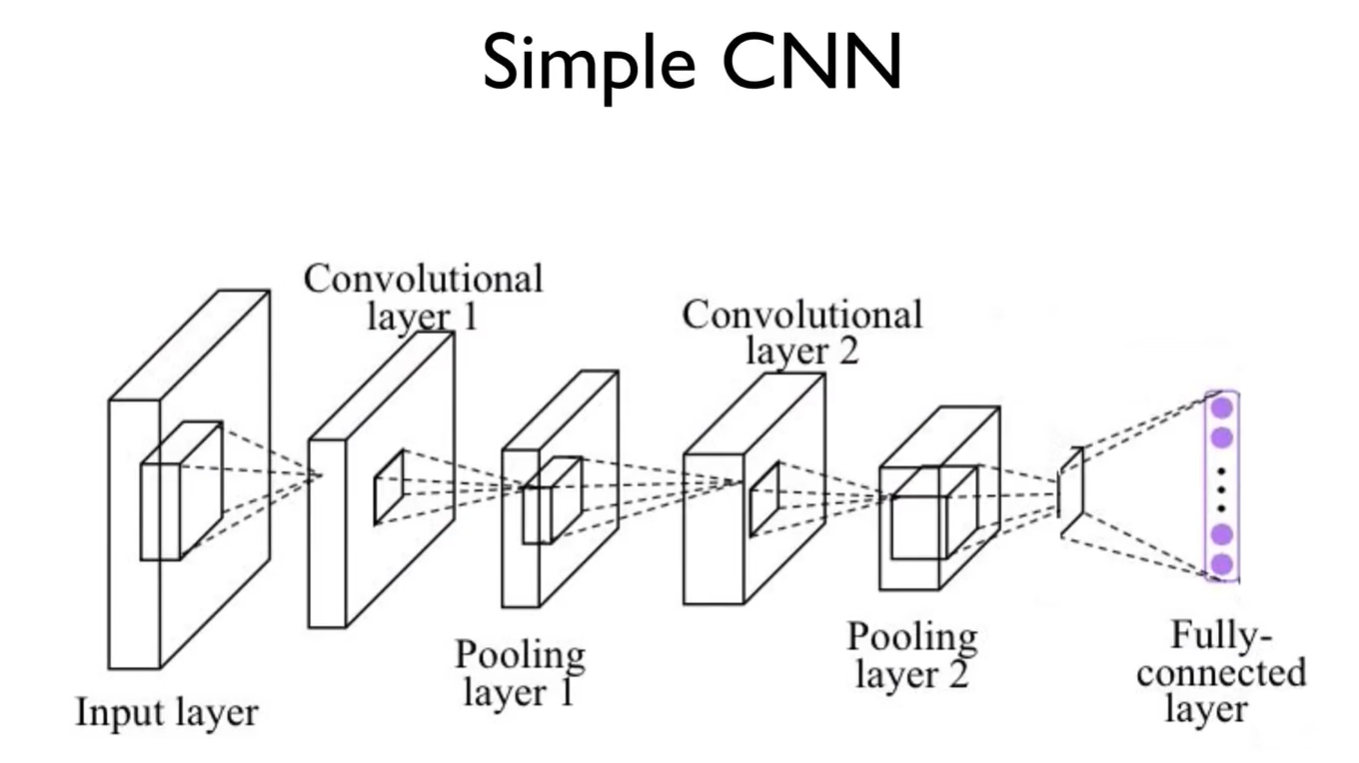

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


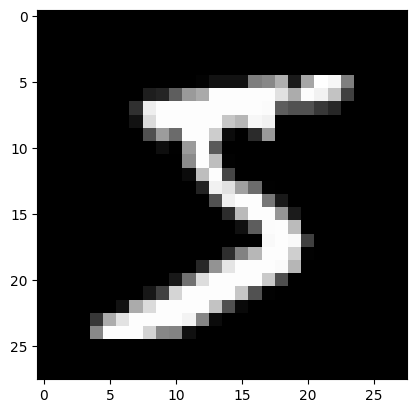

In [1]:
# Lab 11 MNIST and Convolutional Neural Network
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt


mnist = tf.keras.datasets.mnist # 데이터 로드

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[0].reshape(28,28), cmap ='gray')

In [2]:
x_test = x_test / 255
x_train = x_train / 255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# one hot encode y data
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# hyper parameters
learning_rate = 0.001
training_epochs = 12
batch_size = 128

tf.model = tf.keras.Sequential()
# Layer 1
tf.model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu')) # 3x3 커널 크기의 필터를 16개 사용
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Maxpooling

# Layer 2
tf.model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')) # 3x3 커널 크기의 필터를 32개 사용
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Maxpooling

# L3 fully connected
tf.model.add(tf.keras.layers.Flatten()) # 2차원으로 되어있는 배열을 1차원으로 변경하여 결과값과 연결한
tf.model.add(tf.keras.layers.Dense(units=10, kernel_initializer='glorot_normal', activation='softmax')) # 10개의 결과와 연결


tf.model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
tf.model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           8,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,810 (50.04 KB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 78ms/step - accuracy: 0.6427 - loss: 0.2165
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 0.9640 - loss: 0.0305
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.9737 - loss: 0.0226
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9794 - loss: 0.0178
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.9803 - loss: 0.0168
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.9832 - loss: 0.0148
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.9851 - loss: 0.0131
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.9871 - loss: 0.0123
Epoch 9/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.9880 - loss: 0.0113
Epoch 10/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9898 - loss: 0.0102
Epoch 11/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9895 - loss: 0.0100
Epoch 12/12
469/469 ━━━━━━━━━━

In [4]:
# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(0, 10):
    random_index = random.randint(0, x_test.shape[0]-1)
    print("index: ", random_index,
          "actual y: ", np.argmax(y_test[random_index]),
          "predicted y: ", np.argmax(y_predicted[random_index]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
index:  8672 actual y:  1 predicted y:  1
index:  7501 actual y:  3 predicted y:  3
index:  4577 actual y:  5 predicted y:  5
index:  8650 actual y:  1 predicted y:  1
index:  3399 actual y:  7 predicted y:  7
index:  1911 actual y:  5 predicted y:  5
index:  4267 actual y:  1 predicted y:  1
index:  6 actual y:  4 predicted y:  4
index:  3709 actual y:  9 predicted y:  9
index:  6109 actual y:  2 predicted y:  2


In [5]:
evaluation = tf.model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9838 - loss: 0.0131
loss:  0.011239471845328808
accuracy 0.9869999885559082
